## Initial ML Models

In [56]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

#Load the training dataset from an XLSX file
train_data = pd.read_excel("/content/train_data_basic_preprocessed.xlsx")

train_data.head()

,S.No,Comments,Label,clean_data_Comments,lang_type,tokenized_comments
0,HATE_2857,\nDr YNM\n1 month ago\nఇందులో మనం పెద్దగా ఆలోచ...,non-hate,Dr YNM 1 month ago ఇదల మన పదదగ ఆలచచలసన అవసర లద...,Unknown,"['Dr', 'YNM', '1', 'month', 'ago', 'ఇదల', 'మన'..."
1,HATE_2969,\nlakshmankumar kavali\nNext Step is tdp vallu...,non-hate,lakshmankumar kavali Next Step is tdp vallu mo...,English,"['lakshmankumar', 'kavali', 'Next', 'Step', 'i..."
2,HATE_1985,\n​trs party lo telangana kosam poradina valle...,non-hate,trs party lo telangana kosam poradina valle un...,Unknown,"['trs', 'party', 'lo', 'telangana', 'kosam', '..."
3,HATE_2974,\nఅన్నయ్య ప్రింటింగ్ మిషన్ ద్వారా 6093 కోట్ల ర...,non-hate,అననయయ పరటగ మషన దవర 6093 కటల రపయల వన డ పరటగ,Unknown,"['అననయయ', 'పరటగ', 'మషన', 'దవర', '6093', 'కటల',..."
4,HATE_2810,\nఏముంది పదవికోసం గుధ్ధ కూడా నాకేస్తారు ఈ రాజక...,non-hate,ఏమద పదవకస గధధ కడ నకసతర ఈ రజకయ రబదల,Unknown,"['ఏమద', 'పదవకస', 'గధధ', 'కడ', 'నకసతర', 'ఈ', 'ర..."


In [57]:
def plot_confusion_matrix(y_test, y_pred, num_labels=2):
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[f'Class {i}' for i in range(num_labels)],
                yticklabels=[f'Class {i}' for i in range(num_labels)])
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.title('Confusion Matrix')
    plt.show()

In [58]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

#Define a function to plot the ROC curve
def plot_roc_curve(y_true, y_pred, label=None):
    # Calculate the FPR, TPR, and thresholds
    # Add the pos_label parameter to the following line
    fpr, tpr, thresholds = roc_curve(y_true, y_pred, pos_label='hate')

    #Calculate the AUC
    roc_auc = auc(fpr, tpr)

    #Plot the ROC curve
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('ROC Curve')
    plt.legend(loc='lower right')
    plt.text(0.6, 0.3, f'AUC = {roc_auc:.2f}')
    plt.show()


In [59]:
def ml_model_eval(y_test,y_pred):
  accuracy = accuracy_score(y_test, y_pred)
  precision = precision_score(y_test, y_pred, pos_label='hate')
  recall = recall_score(y_test, y_pred,  pos_label='hate')
  f1 = f1_score(y_test, y_pred, pos_label='hate')
  plot_confusion_matrix(y_test,y_pred)

  print("Accuracy:", accuracy)
  print("Precision:",precision)
  print("Recall:",recall)
  print("F1-Score:", f1)

In [60]:
#Text vectorization using TF-IDF
tfidf_vectorizer = TfidfVectorizer()
X_train_tfidf = tfidf_vectorizer.fit_transform(train_data["tokenized_comments"])
y_train = train_data["Label"]

In [61]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

LogisticRegression()

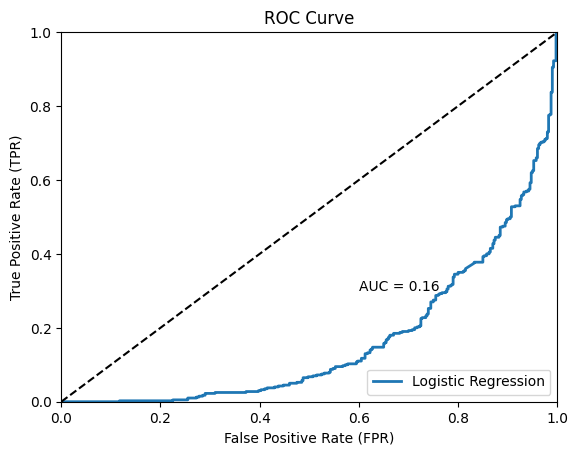

In [62]:
#Load the testing dataset from an XLSX file
test_data = pd.read_excel("/content/test_data_basic_preprocessed.xlsx")

#Preprocess the testing data in the same way as the training data

X_test_tfidf = tfidf_vectorizer.transform(test_data["tokenized_comments"])
y_test = test_data["Label"]
y_pred = model.predict(X_test_tfidf)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'Logistic Regression')



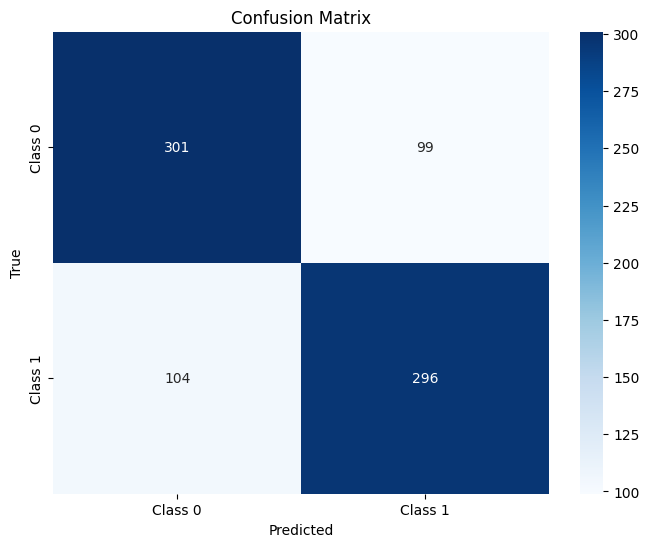

Accuracy: 0.74625
Precision: 0.7432098765432099
Recall: 0.7525
F1-Score: 0.7478260869565219


In [63]:
#Evaluate the Logistic regression model on the test data
ml_model_eval(y_test,y_pred)

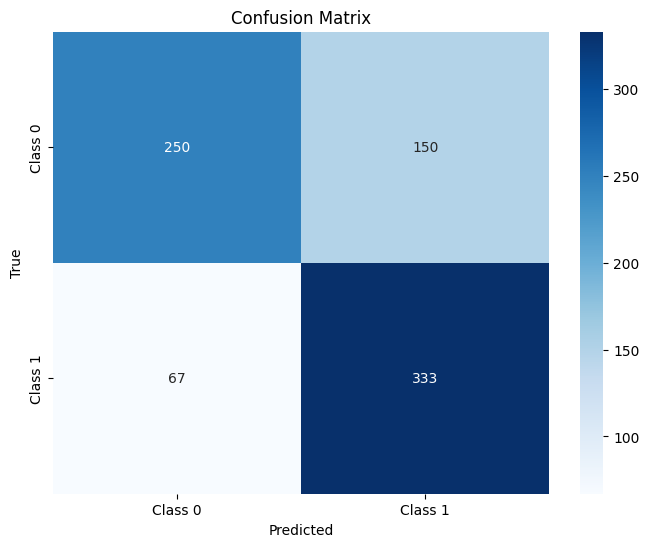

Accuracy: 0.72875
Precision: 0.7886435331230284
Recall: 0.625
F1-Score: 0.697350069735007


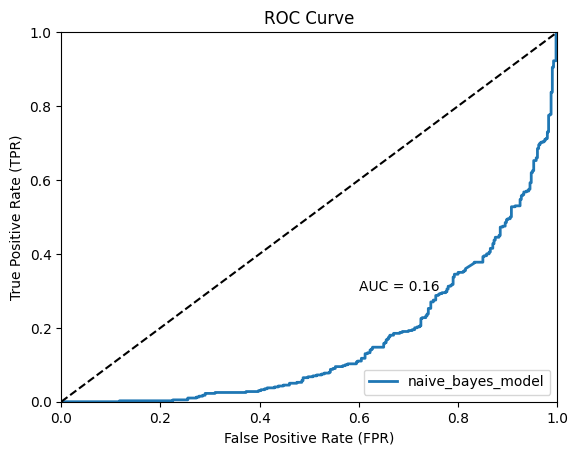

In [64]:
from sklearn.naive_bayes import MultinomialNB
naive_bayes_model = MultinomialNB()
naive_bayes_model.fit(X_train_tfidf, y_train)

#Evaluate the Naive Bayes model on the test data
X_test_tfidf = tfidf_vectorizer.transform(test_data["tokenized_comments"])
y_test = test_data["Label"]
y_pred = naive_bayes_model.predict(X_test_tfidf)
ml_model_eval(y_test,y_pred)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'naive_bayes_model')

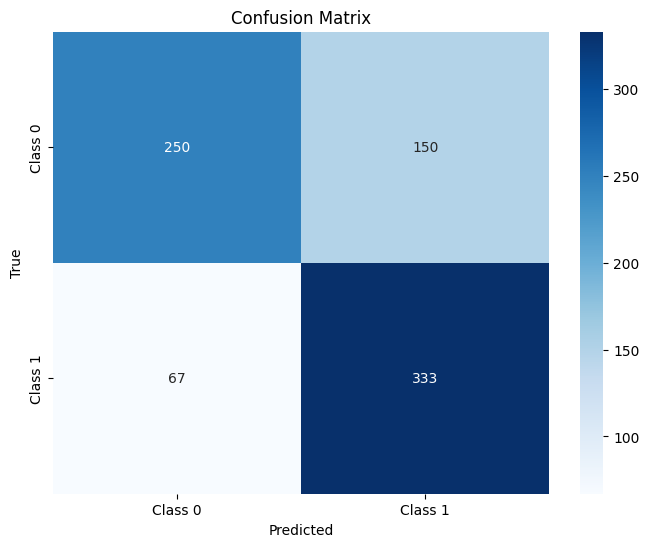

Accuracy: 0.72875
Precision: 0.7886435331230284
Recall: 0.625
F1-Score: 0.697350069735007


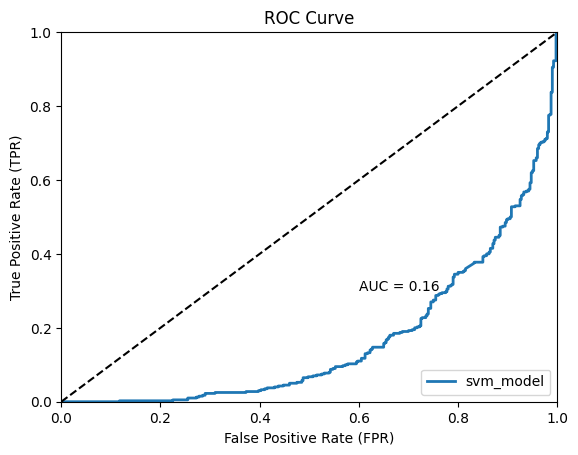

In [65]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train_tfidf, y_train)

#Evaluate the SVM model on the test data
y_pred_svm = svm_model.predict(X_test_tfidf)
ml_model_eval(y_test,y_pred)
plot_roc_curve(y_test, model.predict_proba(X_test_tfidf)[:, 1], 'svm_model')

# Pre processing for sequencial DL models


In [100]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
import numpy as np
original_train_data = pd.read_excel('/content/train_data_basic_preprocessed.xlsx')
new_test_data = pd.read_excel('/content/test_data_basic_preprocessed.xlsx')

#Preprocess the original training data
X_train = original_train_data["tokenized_comments"]
y_train = original_train_data["Label"]

#Preprocess the new test data
X_test = new_test_data["tokenized_comments"]
y_test = new_test_data["Label"]

#Tokenize the text data
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
X_train_sequences = tokenizer.texts_to_sequences(X_train)
X_test_sequences = tokenizer.texts_to_sequences(X_test)

max_sequence_length = max(len(seq) for seq in X_train_sequences)
X_train_padded = pad_sequences(X_train_sequences, maxlen=max_sequence_length, padding='post')
X_test_padded = pad_sequences(X_test_sequences, maxlen=max_sequence_length, padding='post')

# Encode labels as integers with a default index for unknown labels
label_to_index = {'non-hate': 0, 'hate': 1}
default_index = len(label_to_index)  # Use a default index for unknown labels

y_train_encoded = [label_to_index.get(label, default_index) for label in y_train]
y_test_encoded = [label_to_index.get(label, default_index) for label in y_test]

#Convert the encoded labels to NumPy arrays and reshape them
y_train_encoded = np.array(y_train_encoded).reshape(-1, 1)
y_test_encoded = np.array(y_test_encoded).reshape(-1, 1)


In [67]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import numpy as np

def evaluate_model(model, X_test_padded, y_test, index_to_label):
    y_pred = model.predict(X_test_padded)
    y_pred = (y_pred > 0.5).astype(int)

    #Map predictions back to labels
    y_pred_labels = ['non-hate' if np.all(pred == 0) else 'hate' for pred in y_pred]
    y_test_labels = y_test

    accuracy = accuracy_score(y_test_labels, y_pred_labels)
    precision = precision_score(y_test_labels, y_pred_labels, pos_label='hate')
    recall = recall_score(y_test_labels, y_pred_labels, pos_label='hate')
    f1 = f1_score(y_test_labels, y_pred_labels, pos_label='hate')
    plot_confusion_matrix(y_test_labels,y_pred_labels)

    return {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1': f1
    }

# LSTM

## Single cell

In [98]:
y_train_encoded

array([[0],
       [0],
       [0],
       ...,
       [1],
       [1],
       [0]])

Epoch 1/5
100/100 [==============================] - 12s 86ms/step - loss: 0.6932 - accuracy: 0.5163
Epoch 2/5
100/100 [==============================] - 4s 40ms/step - loss: 0.5134 - accuracy: 0.7874
Epoch 3/5
100/100 [==============================] - 3s 27ms/step - loss: 0.2644 - accuracy: 0.9287
Epoch 4/5
100/100 [==============================] - 3s 29ms/step - loss: 0.1460 - accuracy: 0.9668
Epoch 5/5
25/25 [==============================] - 0s 3ms/step


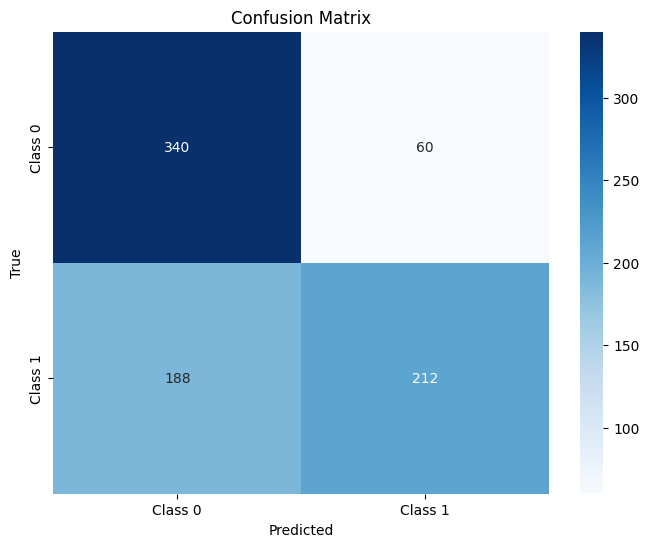

Evaluation Results (LSTM 2 cells ):
Accuracy: 0.69
Precision: 0.6439393939393939
Recall: 0.85
F1-Score: 0.7327586206896552


In [102]:
model_lstm = Sequential()
model_lstm.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_lstm.add(LSTM(64, return_sequences=True))
model_lstm.add(Dense(1, activation='sigmoid'))

model_lstm.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)


evaluation_results = evaluate_model(model_lstm, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (LSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [70]:
model_lstm.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_6 (Embedding)     (None, 71, 100)           1177400   
                                                                 
 lstm_6 (LSTM)               (None, 71, 64)            42240     
                                                                 
 dense_12 (Dense)            (None, 71, 1)             65        
                                                                 
Total params: 1219705 (4.65 MB)
Trainable params: 1219705 (4.65 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


## 2 layers

In [71]:
model_lstm1 = Sequential()
model_lstm1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
model_lstm1.add(LSTM(128, return_sequences=True))
model_lstm1.add(LSTM(64, return_sequences=True))
model_lstm1.add(Dense(64, activation='relu'))
model_lstm1.add(Dense(32, activation='relu'))
model_lstm1.add(Dense(1, activation='sigmoid'))

model_lstm1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model_lstm1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)


Epoch 1/5
100/100 [==============================] - 34s 99ms/step - loss: 0.6936 - accuracy: 0.5169
Epoch 2/5
100/100 [==============================] - 4s 45ms/step - loss: 0.5985 - accuracy: 0.6976
Epoch 3/5
100/100 [==============================] - 2s 24ms/step - loss: 0.4162 - accuracy: 0.8493
Epoch 4/5
100/100 [==============================] - 3s 26ms/step - loss: 0.2971 - accuracy: 0.9120
Epoch 5/5
100/100 [==============================] - 3s 27ms/step - loss: 0.2215 - accuracy: 0.9409


25/25 [==============================] - 1s 5ms/step


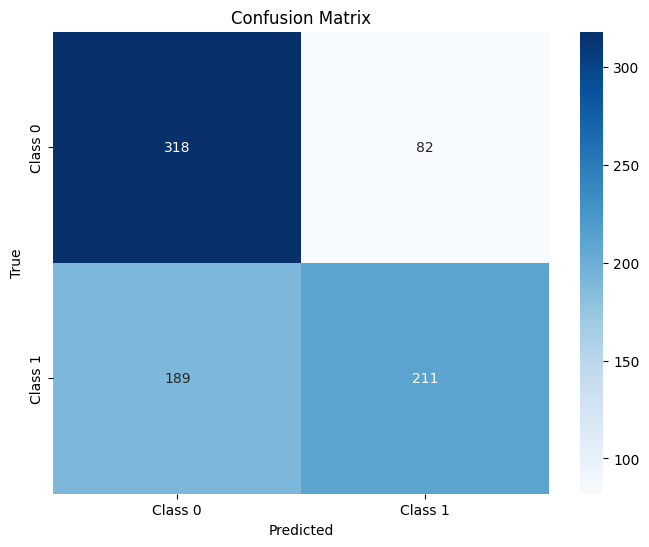

Evaluation Results (LSTM 2 cells ):
Accuracy: 0.66125
Precision: 0.6272189349112426
Recall: 0.795
F1-Score: 0.701212789415656


In [72]:
evaluation_results = evaluate_model(model_lstm1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (LSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [73]:
model_lstm1.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_7 (Embedding)     (None, 71, 100)           1177400   
                                                                 
 lstm_7 (LSTM)               (None, 71, 128)           117248    
                                                                 
 lstm_8 (LSTM)               (None, 71, 64)            49408     
                                                                 
 dense_13 (Dense)            (None, 71, 64)            4160      
                                                                 
 dense_14 (Dense)            (None, 71, 32)            2080      
                                                                 
 dense_15 (Dense)            (None, 71, 1)             33        
                                                                 
Total params: 1350329 (5.15 MB)
Trainable params: 1350

# BI-LSTM

Epoch 1/5
100/100 [==============================] - 14s 104ms/step - loss: 0.6921 - accuracy: 0.5174
Epoch 2/5
100/100 [==============================] - 4s 36ms/step - loss: 0.5118 - accuracy: 0.7877
Epoch 3/5
100/100 [==============================] - 3s 31ms/step - loss: 0.2976 - accuracy: 0.9089
Epoch 4/5
100/100 [==============================] - 3s 31ms/step - loss: 0.1537 - accuracy: 0.9628
Epoch 5/5
25/25 [==============================] - 1s 6ms/step


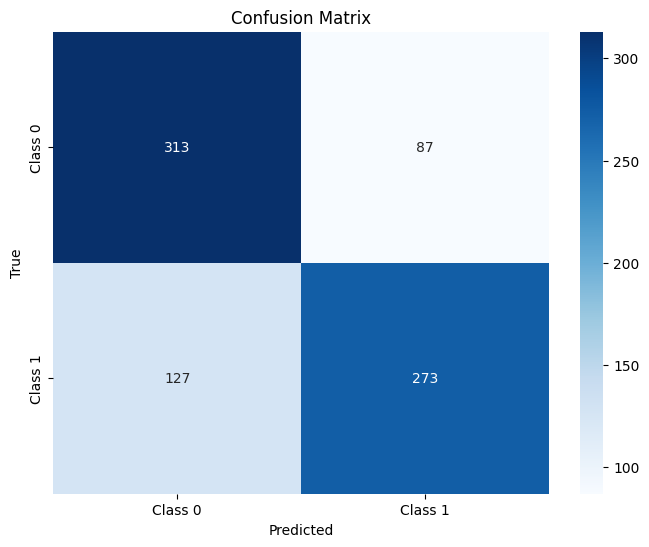

Evaluation Results (BiLSTM 1 cell ):
Accuracy: 0.7325
Precision: 0.7113636363636363
Recall: 0.7825
F1-Score: 0.7452380952380953


In [74]:
bilstm_model = Sequential()
bilstm_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
bilstm_model.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model.add(Dense(1, activation='sigmoid'))  # Changed to a single unit with sigmoid activation

bilstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

bilstm_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

evaluation_results = evaluate_model(bilstm_model, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiLSTM 1 cell ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

In [75]:
bilstm_model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_8 (Embedding)     (None, 71, 100)           1177400   
                                                                 
 bidirectional_6 (Bidirecti  (None, 71, 128)           84480     
 onal)                                                           
                                                                 
 dense_16 (Dense)            (None, 71, 1)             129       
                                                                 
Total params: 1262009 (4.81 MB)
Trainable params: 1262009 (4.81 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [103]:
from keras.models import load_model
bilstm_model.save("bilstm_model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 1/5
100/100 [==============================] - 21s 92ms/step - loss: 0.6932 - accuracy: 0.5176
Epoch 2/5
100/100 [==============================] - 6s 64ms/step - loss: 0.5205 - accuracy: 0.7842
Epoch 3/5
100/100 [==============================] - 3s 27ms/step - loss: 0.3151 - accuracy: 0.9068
Epoch 4/5
100/100 [==============================] - 3s 28ms/step - loss: 0.2268 - accuracy: 0.9378
Epoch 5/5
25/25 [==============================] - 2s 12ms/step


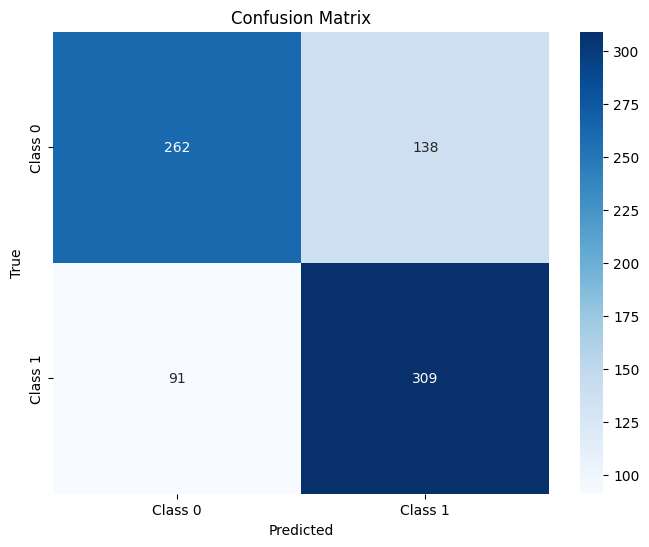

Evaluation Results (BiLSTM 2 cells ):
Accuracy: 0.71375
Precision: 0.7422096317280453
Recall: 0.655
F1-Score: 0.6958831341301461


In [76]:
#BILSTM 2 cells

bilstm_model1 = Sequential()
bilstm_model1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
bilstm_model1.add(Bidirectional(LSTM(128, return_sequences=True)))
bilstm_model1.add(Bidirectional(LSTM(64, return_sequences=True)))
bilstm_model1.add(Dense(64, activation='relu'))
bilstm_model1.add(Dense(32, activation='relu'))
bilstm_model1.add(Dense(1, activation='sigmoid'))

bilstm_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

bilstm_model1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

evaluation_results = evaluate_model(bilstm_model1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiLSTM 2 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])


#Bi GRU


In [78]:
from tensorflow.keras.layers import GRU
gru_model = Sequential()
gru_model.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
gru_model.add(Bidirectional(GRU(128, return_sequences=True)))
gru_model.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model.add(Dense(64, activation='relu'))
gru_model.add(Dense(32, activation='relu'))
gru_model.add(Dense(1, activation='sigmoid'))

gru_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [79]:
gru_model.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

Epoch 1/5
100/100 [==============================] - 17s 103ms/step - loss: 0.6936 - accuracy: 0.5120
Epoch 2/5
100/100 [==============================] - 4s 43ms/step - loss: 0.5909 - accuracy: 0.6998
Epoch 3/5
100/100 [==============================] - 5s 48ms/step - loss: 0.2360 - accuracy: 0.9266
Epoch 4/5
100/100 [==============================] - 4s 40ms/step - loss: 0.1072 - accuracy: 0.9726
Epoch 5/5
100/100 [==============================] - 3s 31ms/step - loss: 0.0534 - accuracy: 0.9869


25/25 [==============================] - 1s 10ms/step


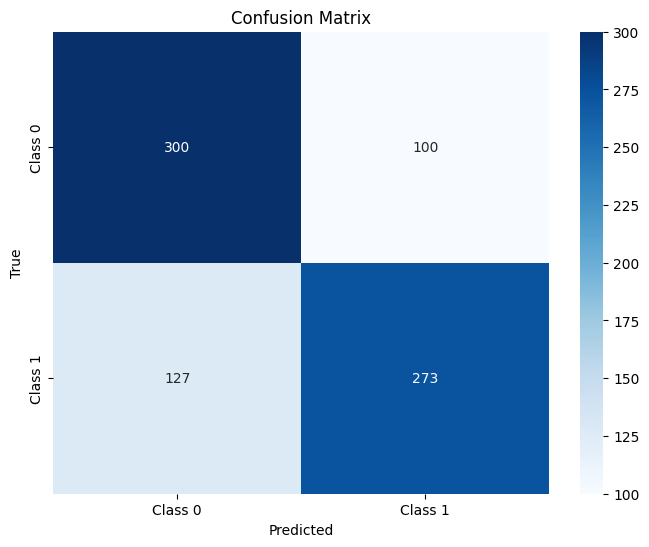

Evaluation Results (BiGRU 1 cells ):
Accuracy: 0.71625
Precision: 0.702576112412178
Recall: 0.75
F1-Score: 0.7255139056831924


In [80]:
evaluation_results = evaluate_model(gru_model, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print("Evaluation Results (BiGRU 1 cells ):")
print("Accuracy:", evaluation_results['accuracy'])
print("Precision:", evaluation_results['precision'])
print("Recall:", evaluation_results['recall'])
print("F1-Score:", evaluation_results['f1'])

Epoch 1/5
100/100 [==============================] - 12s 94ms/step - loss: 0.6932 - accuracy: 0.5168
Epoch 2/5
100/100 [==============================] - 4s 40ms/step - loss: 0.5937 - accuracy: 0.6802
Epoch 3/5
100/100 [==============================] - 2s 24ms/step - loss: 0.2878 - accuracy: 0.9140
Epoch 4/5
100/100 [==============================] - 2s 21ms/step - loss: 0.1919 - accuracy: 0.9452
Epoch 5/5
25/25 [==============================] - 1s 5ms/step


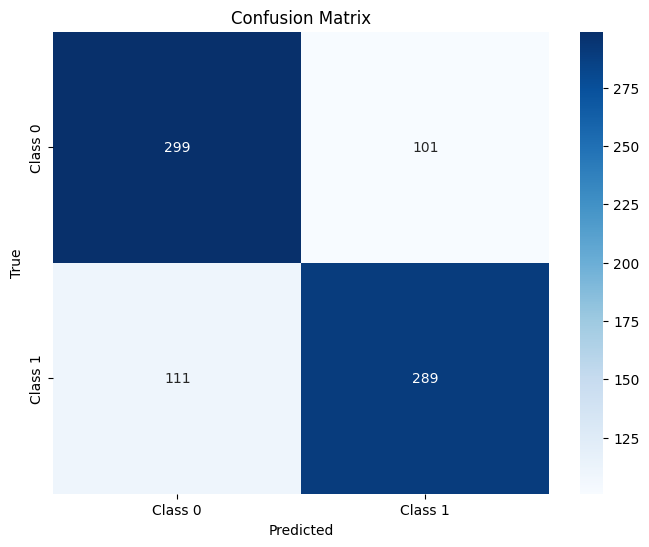

Accuracy on New Test Data Bi Directional GRU : {'accuracy': 0.735, 'precision': 0.7292682926829268, 'recall': 0.7475, 'f1': 0.7382716049382716}


In [82]:
import pandas as pd
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.metrics import accuracy_score
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, GRU, Dense
import numpy as np

gru_model1 = Sequential()
gru_model1.add(Embedding(input_dim=len(tokenizer.word_index) + 1, output_dim=100, input_length=max_sequence_length))
gru_model1.add(Bidirectional(GRU(64, return_sequences=True)))
gru_model1.add(Dense(1, activation='sigmoid'))

gru_model1.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
gru_model1.fit(X_train_padded, y_train_encoded, epochs=5, batch_size=32)

accuracy_dl = evaluate_model(gru_model1, X_test_padded, y_test, {0: 'non-hate', 1: 'hate'})
print(f"Accuracy on New Test Data Bi Directional GRU : {accuracy_dl}")



# Stacking method of regular ML Models

In [83]:
from sklearn.ensemble import StackingClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB


In [84]:
base_models = [
    ('lr', LogisticRegression()),
    ('rf', RandomForestClassifier()),
    ('svc', SVC(probability=True)),
    ('nb', MultinomialNB())
]

In [85]:
stacking_classifier = StackingClassifier(estimators=base_models, final_estimator=LogisticRegression())

In [86]:
stacking_classifier.fit(X_train_tfidf, y_train)
y_pred = stacking_classifier.predict(X_test_tfidf)

In [87]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy on the test data: {accuracy}")

Accuracy on the test data: 0.74875


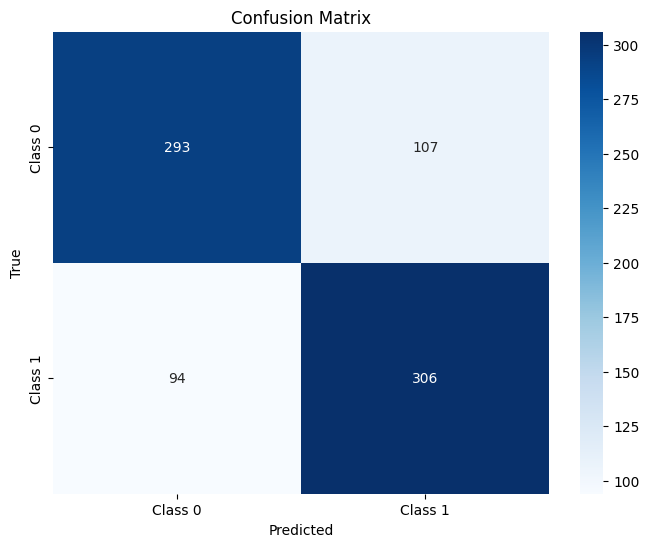

Accuracy: 0.74875
Precision: 0.7571059431524548
Recall: 0.7325
F1-Score: 0.7445997458703939


In [88]:
ml_model_eval(y_test,y_pred)